In [ ]:
!pip install eonr
!pip install pandas==1.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 67.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.0 which is incompatible.
xarray 2025.1.1 requires pandas>=2.1, but you have pandas 1.5.0 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.0 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.0 which is incompatible.
bigframes 1.33.0 requires pandas>=1.5.3, but you have pandas 1.5.0 whi

In [ ]:
import os
import pandas as pd
import eonr
print('EONR version: {0}'.format(eonr.__version__))

EONR version: 0.2.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: create a code do read a the csv "minnesota_2012.csv" using pandas and it will access my drive and the file is in the folder EONR_NOFRN
df_data = pd.read_csv("/content/drive/My Drive/EONR_NOFRN/pivotbio_don.csv")
df_data.head()


,year,location,plot,trt,rep,time_n,rate_n_applied_lbsac,yld_grain_dry_bsac,nup_total_kgha,soil_plus_fert_n_kgha
0,2024,Don_batie,1,PivotBIO + O N,1,Post,21,141.521829,21,21
1,2024,Don_batie,2,PivotBIO + O N,2,Post,21,165.997730,21,21
2,2024,Don_batie,3,PivotBIO + O N,3,Post,21,134.209862,21,21
3,2024,Don_batie,4,PivotBIO + O N,4,Post,21,152.730967,21,21
4,2024,Don_batie,5,PivotBIO + O N,5,Post,21,142.074645,21,21


In [ ]:
col_n_app = 'rate_n_applied_lbsac'
col_yld = 'yld_grain_dry_bsac'

In [ ]:
unit_currency = '$'
unit_fert = 'lbs'
unit_grain = 'bs'
unit_area = 'ac'

In [ ]:
cost_n_fert = 0.6  # in USD per kg nitrogen
price_grain = 4.35  # in USD per kg grain

In [ ]:
import os
base_dir = os.path.join(os.getcwd(), 'eonr_tutorial')

my_eonr = eonr.EONR(cost_n_fert=cost_n_fert,
                    price_grain=price_grain,
                    col_n_app=col_n_app,
                    col_yld=col_yld,
                    unit_currency=unit_currency,
                    unit_grain=unit_grain,
                    unit_fert=unit_fert,
                    unit_area=unit_area,
                    model=None,
                    base_dir=base_dir)

In [ ]:
my_eonr.calculate_eonr(df_data)


Computing EONR for Don_batie 2024 Post
Cost of N fertilizer: $0.60 per lbs
Price grain: $4.35 per bs
Fixed costs: $0.00 per ac
Checking quadratic and quadric-plateau models for best fit..
Quadratic model r^2: 0.87
Quadratic-plateau model r^2: 0.87
Using the quadratic-plateau model..

EONR is past the point of available data, so confidence bounds are not being computed


/usr/local/lib/python3.11/dist-packages/eonr/eonr.py:1936: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ci = df_ci.append(df_row, ignore_index=True)


Economic optimum N rate (EONR): 252.5 lbs per ac [nan, nan] (90.0% confidence)
Maximum return to N (MRTN): $441.35 per ac


/usr/local/lib/python3.11/dist-packages/eonr/eonr.py:2282: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df_results = self.df_results.append(pd.DataFrame(


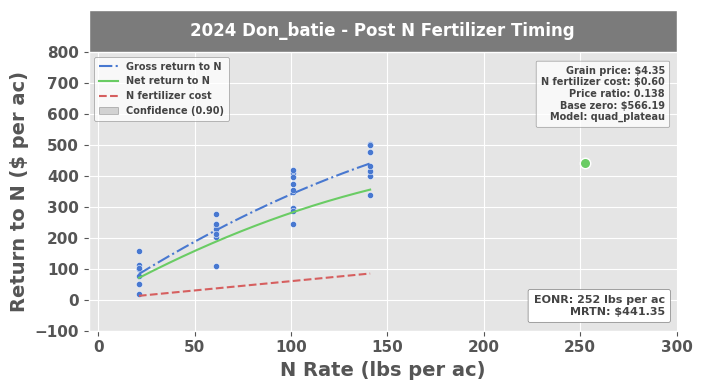

In [ ]:
my_eonr.plot_eonr(x_min=-5, x_max=300, y_min=-100, y_max=800)

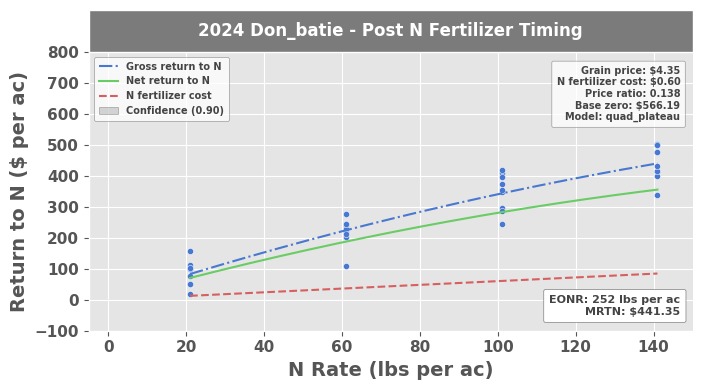

In [ ]:
# Instead of using save_fig, manually save the figure after calling plot_eonr
my_eonr.plot_eonr(x_min=-5, x_max=150, y_min=-100, y_max=800)
import matplotlib.pyplot as plt # Make sure matplotlib is imported
save_path = '/content/drive/My Drive/EONR_NOFRN/eonr_plot2.png' # Specify the save path
plt.savefig(save_path) # Save the figure